# using tensorflow to do linear regression  y = 8x + 2 with tf.GradientTape

In [1]:
import tensorflow as tf
import numpy as np
import random
# Loss function
def loss(real_y, pred_y):
    return tf.abs(real_y - pred_y)
# Training data
x_train = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_train = np.asarray([8*i + 2 for i in x_train]) # y = 8x + 2

# Trainable variables
a = tf.Variable(random.random(), trainable=True)
b = tf.Variable(random.random(), trainable=True)
# Step function
pred_flag=False
def step(real_x, real_y):
    with tf.GradientTape(persistent=True) as tape:
        # Make prediction
        pred_y = a*real_x + b
        # Calculate loss
        reg_loss= loss(real_y, pred_y)
    if not pred_flag:
        # Calculate gradients
        a_gradients, b_gradients = tape.gradient( reg_loss   , (a, b))

        # Update variables
        a.assign_sub(a_gradients * 0.001) 
        b.assign_sub(b_gradients * 0.001)
    else:
        return pred_y, reg_loss   


In [2]:
# Training loop
for i in range(10000):
    step(x_train, y_train)
    if i==0:
        print("at epoch {} the approximation is now ...\n".format(str(i)))
        print(f'y ≈ {a.numpy()}x + {b.numpy()} \n')
print("finished at epoch 10000 \n ")
print(f'y ≈ {a.numpy()}x + {b.numpy()}')

at epoch 0 the approximation is now ...

y ≈ 0.2633945941925049x + 0.13362398743629456 

finished at epoch 10000 
 
y ≈ 8.05439281463623x + 2.000628709793091


In [3]:
pred_flag=True
prediction=[]
for _x,_y in zip(x_train,y_train):
    temp=step(_x,_y)
    prediction.append(temp)
len(prediction), prediction

    


(11,
 [(<tf.Tensor: id=330027, shape=(), dtype=float32, numpy=2.0006287>,
   <tf.Tensor: id=330030, shape=(), dtype=float32, numpy=0.0006287098>),
  (<tf.Tensor: id=330035, shape=(), dtype=float32, numpy=10.055021>,
   <tf.Tensor: id=330038, shape=(), dtype=float32, numpy=0.055021286>),
  (<tf.Tensor: id=330043, shape=(), dtype=float32, numpy=18.109415>,
   <tf.Tensor: id=330046, shape=(), dtype=float32, numpy=0.109415054>),
  (<tf.Tensor: id=330051, shape=(), dtype=float32, numpy=26.163807>,
   <tf.Tensor: id=330054, shape=(), dtype=float32, numpy=0.16380692>),
  (<tf.Tensor: id=330059, shape=(), dtype=float32, numpy=34.2182>,
   <tf.Tensor: id=330062, shape=(), dtype=float32, numpy=0.21820068>),
  (<tf.Tensor: id=330067, shape=(), dtype=float32, numpy=42.272594>,
   <tf.Tensor: id=330070, shape=(), dtype=float32, numpy=0.27259445>),
  (<tf.Tensor: id=330075, shape=(), dtype=float32, numpy=50.326984>,
   <tf.Tensor: id=330078, shape=(), dtype=float32, numpy=0.3269844>),
  (<tf.Tensor:

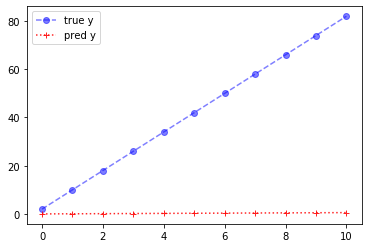

In [6]:
pred_y=[float(a[1]) for a in prediction]
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()

ax.set_prop_cycle(color=['blue', 'red'])
plt.plot(x_train, y_train , alpha=0.5 , linestyle='--',marker='o')
plt.plot(x_train, pred_y ,alpha=0.85, linestyle=':', marker='+')


plt.legend(['true y', 'pred y'], loc='upper left')

plt.show()

# using tensorflow to approximate  f(x,y) = x²  + y²  + 7 with tf.GradientTape

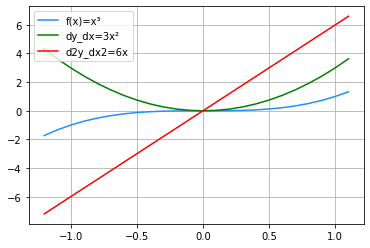

In [8]:
"""
using tf.GradientTape() to calculate derivatives for the function
f(x)=x³
f'(x)=3x²
f''(x)=6x
"""
x0=tf.range(-1.2,1.2,0.1)
x=tf.Variable(x0)
def f(x):
    return x*x*x
def second_derivative(x):
    with tf.GradientTape() as t:
        with tf.GradientTape() as t2:
            y=f(x)
        dy_dx=t2.gradient(y,x)
    d2y_dx2=t.gradient(dy_dx,x)
    return d2y_dx2 , dy_dx

plt.plot(x0,f(x0), color='dodgerblue')

d3, d2=second_derivative(x)
plt.plot(x0,d2, color='green')
plt.plot(x0,d3, color='red')
plt.legend(['f(x)=x³', 'dy_dx=3x²','d2y_dx2=6x'], loc='upper left')
plt.grid()
    

## === what we are interested in using gradient tape , is to apply chain rules 
## === i.e , the ability to get the derivative of z  w.r.t y 

In [10]:
x = tf.ones((2, 2 ))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x) # 2+2=4 
    z = tf.multiply(y, y) #y²=4*4
    
# derivative of z with respect to the original input tensor x
#dz_dx = t.gradient(z, x)
# Use the tape to compute the derivative of z with respect to the intermedia value y.
dz_dy = t.gradient(z, y)
print( dz_dy.numpy() , " it should be equal to 8.0")


8.0  it should be equal to 8.0
